In [ ]:
import pandas as pd
import numpy as np

Load the dataset

In [2]:
data = pd.read_csv("Country-data (1).csv")
df = pd.read_csv("Country-data (1).csv",index_col="country")


In [3]:
df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Exploratory Data Analysis

<Axes: xlabel='gdpp'>

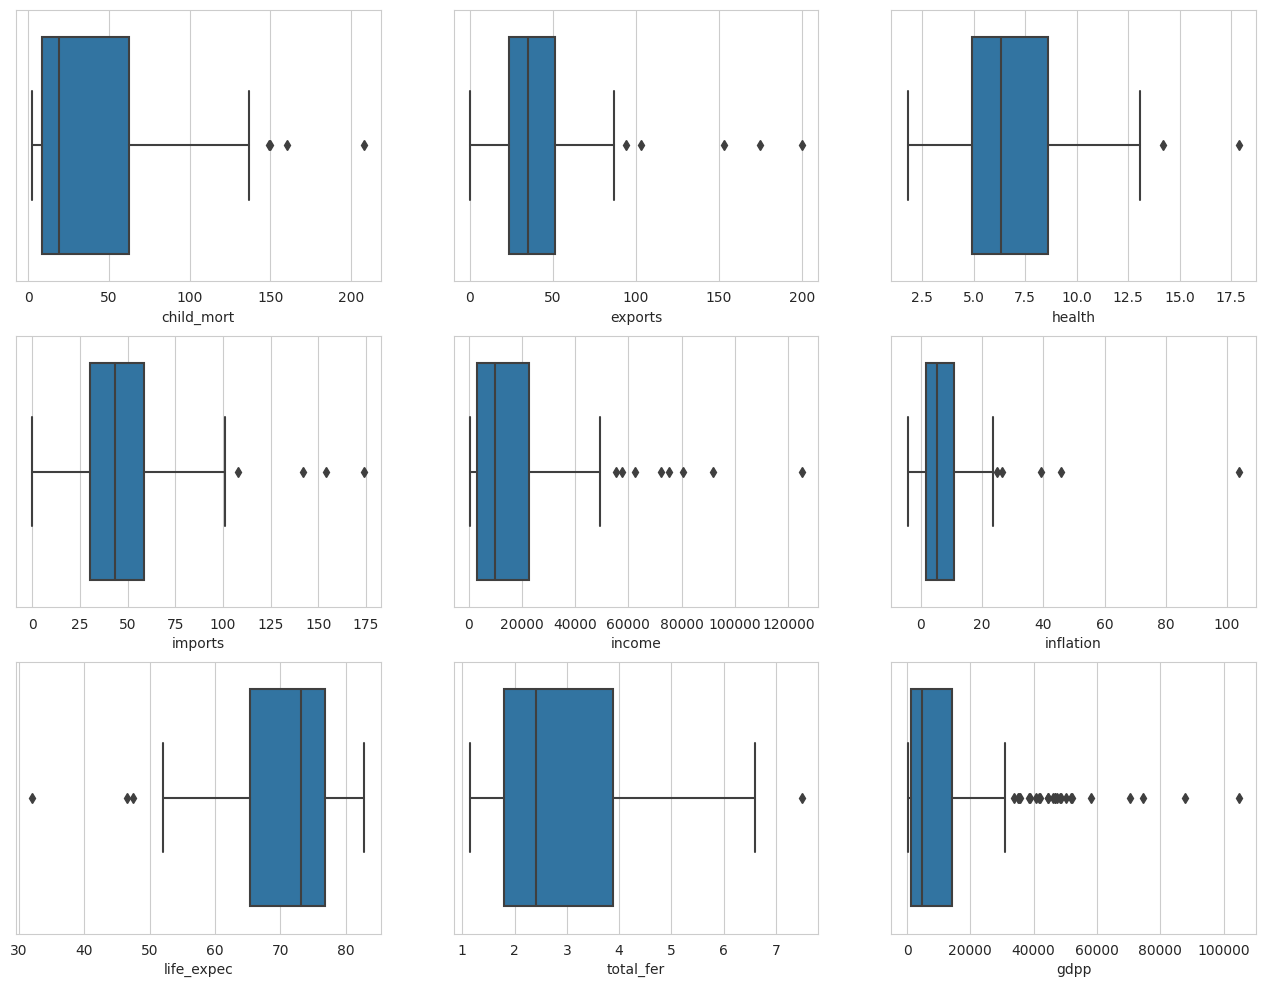

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='child_mort',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='exports',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='health',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='imports',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='income',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='inflation',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='life_expec',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='total_fer',data=df)
plt.subplot(3,3,9)
sns.boxplot(x='gdpp',data=df)


In [5]:
def outlier_treatment(data_c):
    sorted(data_c)
    Q1, Q3 = np.percentile(data_c,[25,75])
    IQR = Q3- Q1
    lower_range = Q1- (1.5*IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,  upper_range

for col in df.columns :
    lower, upper = outlier_treatment(df[col])
    df[col] = np.clip(df[col],a_min =lower, a_max =upper)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_col = df.columns
df = scaler.fit_transform(df)
df = pd.DataFrame(df,index=data["country"],columns=df_col)

<Axes: xlabel='gdpp'>

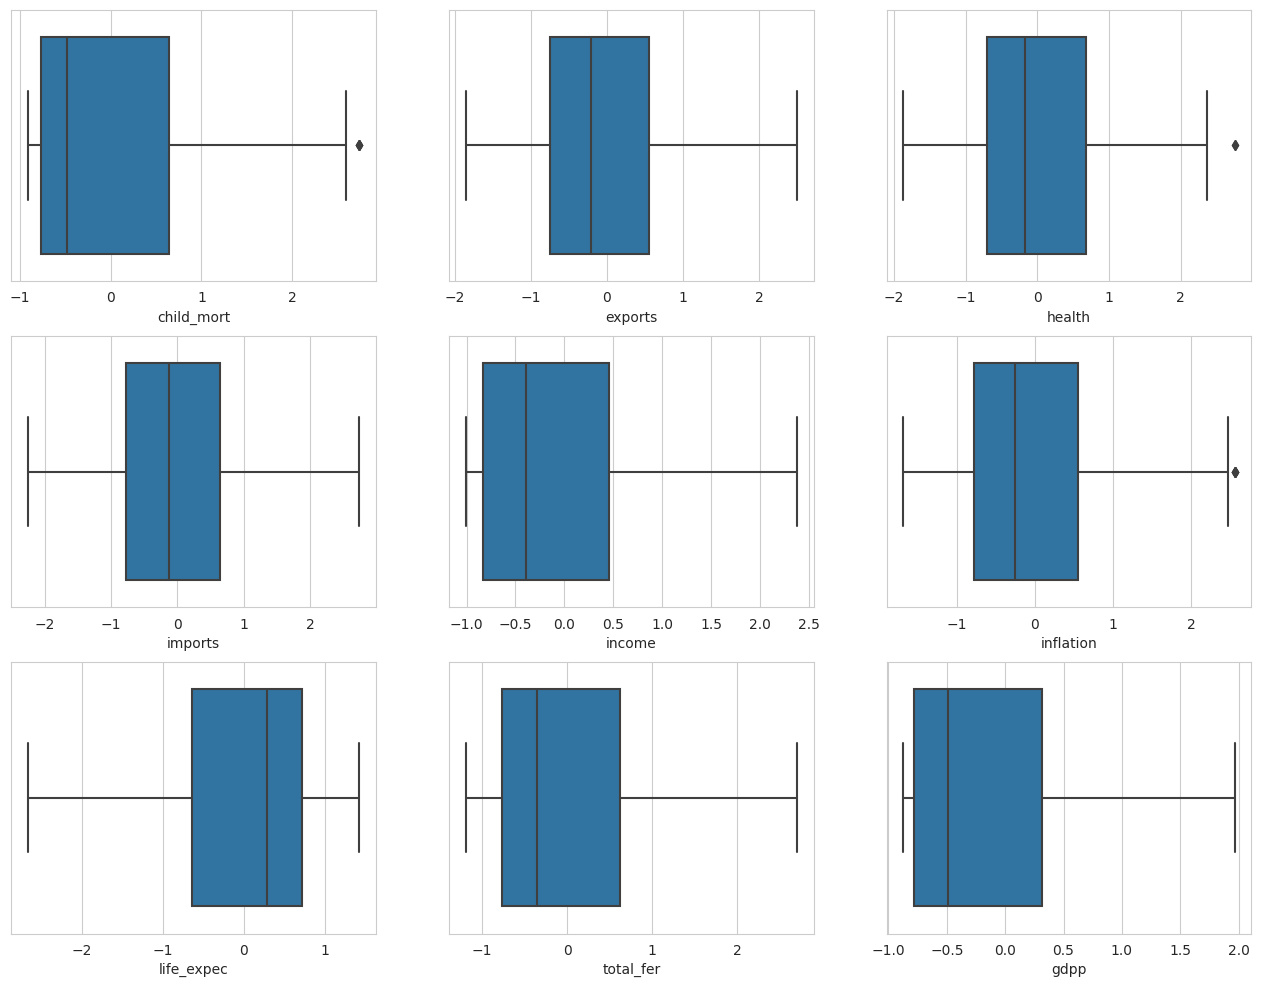

In [7]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='child_mort',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='exports',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='health',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='imports',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='income',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='inflation',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='life_expec',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='total_fer',data=df)
plt.subplot(3,3,9)
sns.boxplot(x='gdpp',data=df)



In [8]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [9]:
import warnings

<h3>KMeans Clustering

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# for  i in range (2,10):
#     clusterer = KMeans(n_clusters= i, random_state=42)
#     cluster_label = clusterer.fit_predict(df.values)
#     silhouette_s = silhouette_score(df.values,cluster_label)
#     print(i," clusters ->",silhouette_s)

In [11]:
k_means = KMeans(n_clusters=3,random_state=41).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
k_means.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [13]:
df_final = data.copy()

In [14]:
df_final["KMeans_cluster"]= k_means.labels_

In [15]:
df_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [16]:
df_final[df_final["KMeans_cluster"]==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0


In [17]:
df_final[df_final["KMeans_cluster"]==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1


In [18]:
df_final[df_final["KMeans_cluster"]==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334,2


In [19]:
#0 - devoloping
#1 - developed
#2 - under-developing

df_final["KMeans_cluster"]= df_final["KMeans_cluster"].replace([0,1,2],["devoloping","developed","under-developing"])

In [20]:
df_final.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,under-developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,devoloping
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,devoloping
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,under-developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,devoloping
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,devoloping
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,devoloping
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,devoloping


In [21]:
df_final["KMeans_cluster"].value_counts()

devoloping          79
under-developing    47
developed           41
Name: KMeans_cluster, dtype: int64

In [22]:

df_new = pd.DataFrame(data.iloc[:,1:].values,columns = data.iloc[:,1:].columns ,index=data["country"])

In [23]:
df_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0


<h4>Hierachial clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
from sklearn.preprocessing import RobustScaler

In [26]:
scaler = RobustScaler()
df_col = df_new.columns
df_new = scaler.fit_transform(df_new)
df_new = pd.DataFrame(df_new,index=data["country"],columns=df_col)

In [27]:
dendogram = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
labels = dendogram.fit_predict(df_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [28]:
labels

array([1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [29]:
df_new["Hierachial_clustering"]=labels

In [30]:
df_new[df_new["Hierachial_clustering"]==0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierachial_clustering
country,,,,,,,,,,
Australia,-0.269266,-0.551724,0.654891,-0.784588,1.616868,-0.473154,0.773913,-0.230216,3.713836,0
Austria,-0.278552,0.591652,1.271739,0.157618,1.709437,-0.505257,0.643478,-0.465228,3.320755,0
Bahamas,-0.102136,0.000000,0.426630,0.014011,0.665467,-0.646868,0.060870,-0.263789,1.834906,0
Bahrain,-0.198700,1.252269,-0.366848,0.266200,1.601440,0.229306,0.252174,-0.119904,1.261006,0
Belgium,-0.274838,1.502722,1.190217,1.099825,1.601440,-0.392617,0.600000,-0.263789,3.124214,0
Brunei,-0.163417,1.176044,-0.945652,-0.535902,3.632810,1.265101,0.347826,-0.273381,2.408805,0
Canada,-0.254410,-0.214156,1.353261,-0.430823,1.580869,-0.281879,0.713043,-0.374101,3.360063,0
Cyprus,-0.291551,0.551724,-0.095109,0.497373,1.231165,-0.378076,0.591304,-0.474820,2.055031,0
Denmark,-0.282266,0.562613,1.380435,0.010508,1.750579,-0.242729,0.556522,-0.258993,4.193396,0


In [31]:
df_new[df_new["Hierachial_clustering"]==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierachial_clustering
country,,,,,,,,,,
Afghanistan,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877,1
Benin,1.702878,-0.406534,-0.603261,-0.213660,-0.418617,-0.503915,-0.982609,1.414868,-0.306761,1
Burkina Faso,1.795729,-0.573503,0.114130,-0.479860,-0.438673,0.158837,-1.321739,1.659472,-0.321148,1
Burundi,1.379759,-0.946642,1.434783,-0.143608,-0.472924,0.772931,-1.339130,1.846523,-0.348192,1
Cameroon,1.647168,-0.464610,-0.323370,-0.570928,-0.375418,-0.389262,-1.373913,1.294964,-0.263365,1
Central African Republic,2.408542,-0.842105,-0.635870,-0.588441,-0.466547,-0.378076,-2.226087,1.342926,-0.331289,1
Chad,2.427112,0.065336,-0.486413,0.007005,-0.412960,0.111857,-1.443478,2.004796,-0.295833,1
Comoros,1.279480,-0.671506,-0.491848,0.294221,-0.439702,-0.170022,-0.626087,1.122302,-0.305896,1
"Congo, Dem. Rep.",1.795729,0.221416,0.432065,0.220665,-0.480895,1.723714,-1.356522,1.980815,-0.340094,1


In [32]:
df_new[df_new["Hierachial_clustering"]==2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierachial_clustering
country,,,,,,,,,,
Albania,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811,2
Algeria,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723,2
Angola,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836,2
Antigua and Barbuda,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767,2
Argentina,-0.089136,-0.584392,0.483696,-0.956217,0.449473,1.734899,0.234783,-0.019185,0.443396,2
...,...,...,...,...,...,...,...,...,...,...
Uruguay,-0.161560,-0.315789,0.551630,-0.626970,0.367190,-0.053691,0.286957,-0.158273,0.569182,2
Uzbekistan,0.315692,-0.119782,-0.138587,-0.518389,-0.294163,1.242729,-0.373913,-0.033573,-0.257862,2
Vanuatu,0.183844,0.421053,-0.290761,0.329247,-0.360504,-0.309843,-0.878261,0.522782,-0.132862,2


In [33]:
#0 - developed
#2 - devoloping
#1 - under-devoloping

In [34]:
df_new["Hierachial_clustering"] = df_new["Hierachial_clustering"].replace([2,0,1],["devoloping","developed","under-developing"])

In [35]:
df_final["Hierachial_clustering"] = df_new["Hierachial_clustering"].values

In [36]:
df_final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster,Hierachial_clustering
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,under-developing,under-developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,devoloping,devoloping
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,devoloping,devoloping
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,under-developing,devoloping
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,devoloping,devoloping
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,devoloping,devoloping
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,devoloping,devoloping
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed,developed
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed,developed
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,devoloping,devoloping


In [37]:
df_new["Hierachial_clustering"].value_counts()

devoloping          92
under-developing    38
developed           37
Name: Hierachial_clustering, dtype: int64

<h4>PCA

In [55]:

df_pca = pd.DataFrame(data.iloc[:,1:].values,columns = data.iloc[:,1:].columns ,index=data["country"])

In [39]:
df_pca

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0


In [40]:
df_pca.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [41]:
from sklearn.decomposition import PCA

In [42]:
social = ["child_mort",'health','life_expec','total_fer']
economic = ['exports','imports','income','inflation','gdpp']


In [43]:
pca = PCA(n_components=1)


In [48]:
pca_social = pca.fit_transform(df_new[social])
pca_social = pd.DataFrame(data= pca_social, columns = ["social"])
pca_social

,social
0,1.981272
1,-0.842504
2,-0.293733
3,2.432930
4,-0.785521
...,...
162,0.510495
163,-0.494531
164,-0.546648
165,0.876461


In [50]:
pca_economic = pca.fit_transform(df_new[economic])
pca_economic = pd.DataFrame(data = pca_economic, columns=["economic"])
pca_economic

,economic
0,-1.570406
1,-0.774652
2,-0.941064
3,-0.967433
4,0.292285
...,...
162,-0.711342
163,-1.290174
164,-0.533227
165,-1.622277


In [58]:
df_pca =pd.concat([df_final,pca_economic,pca_social],axis=1)

In [59]:
df_pca

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster,Hierachial_clustering,economic,social
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,under-developing,under-developing,-1.570406,1.981272
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,devoloping,devoloping,-0.774652,-0.842504
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,devoloping,devoloping,-0.941064,-0.293733
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,under-developing,devoloping,-0.967433,2.432930
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,devoloping,devoloping,0.292285,-0.785521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,devoloping,devoloping,-0.711342,0.510495
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,devoloping,devoloping,-1.290174,-0.494531
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,devoloping,devoloping,-0.533227,-0.546648
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,under-developing,under-developing,-1.622277,0.876461


In [61]:
d =pd.concat([pca_economic,pca_social],axis=1)
d

,economic,social
0,-1.570406,1.981272
1,-0.774652,-0.842504
2,-0.941064,-0.293733
3,-0.967433,2.432930
4,0.292285,-0.785521
...,...,...
162,-0.711342,0.510495
163,-1.290174,-0.494531
164,-0.533227,-0.546648
165,-1.622277,0.876461


In [62]:
explained_variance = pca.explained_variance_ratio_

In [63]:
explained_variance

array([0.54550082])

In [65]:
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
d["Cluster"]=cluster_labels


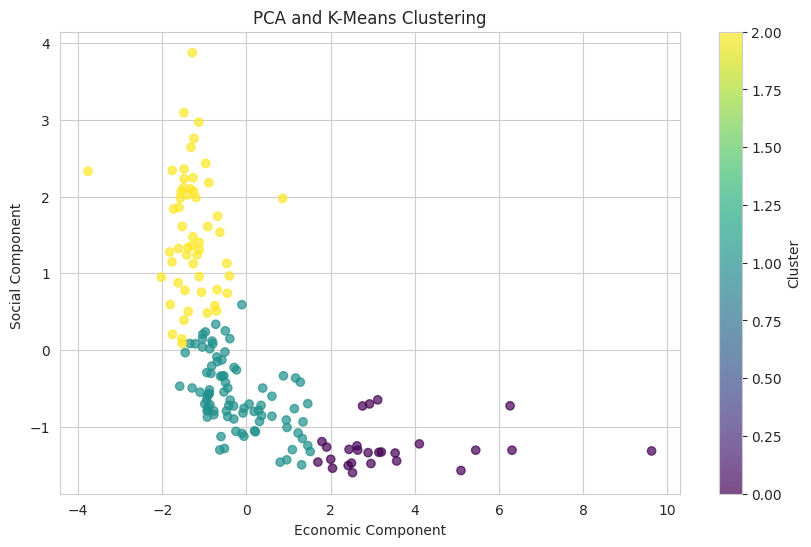

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Economic Component')
plt.ylabel('Social Component ')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [78]:
df_final["PCA"]= cluster_labels

In [80]:
df_final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster,Hierachial_clustering,PCA
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,under-developing,under-developing,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,devoloping,devoloping,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,devoloping,devoloping,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,under-developing,devoloping,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,devoloping,devoloping,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,devoloping,devoloping,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,devoloping,devoloping,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed,developed,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed,developed,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,devoloping,devoloping,1


In [ ]:
#0-developed
#1- devoloping
#2 - under-devoloping

In [81]:
df_final["PCA"]= df_final["PCA"].replace([0,1,2],["developed","devoloping","under-devoloping"])
df_final.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_cluster,Hierachial_clustering,PCA
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,under-developing,under-developing,under-devoloping
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,devoloping,devoloping,devoloping
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,devoloping,devoloping,devoloping
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,under-developing,devoloping,under-devoloping
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,devoloping,devoloping,devoloping
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,devoloping,devoloping,devoloping
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,devoloping,devoloping,devoloping
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,developed,developed,developed
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,developed,developed,developed
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,devoloping,devoloping,devoloping


In [83]:
df_final["PCA"].value_counts()

devoloping          86
under-devoloping    55
developed           26
Name: PCA, dtype: int64